In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
free_plans_converted=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CLIENTS/5. Miki/5th/Free plans, Top 10 converted, Trialssss.csv')
free_trials_converted=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CLIENTS/5. Miki/5th/FreeTrials, Top 10 converted, Trial.csv')
FreePlanDays=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CLIENTS/5. Miki/5th/FreePlanDays.csv')
FreeTrialDays=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CLIENTS/5. Miki/5th/FreeTrialDays.csv')
SMB_channel=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CLIENTS/5. Miki/5th/Summary Segment   Channel Name.csv')
SMB_channel_free_plans=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CLIENTS/5. Miki/5th/Summary Segment Channel Name Free Plan.csv')

In [ ]:
free_plans_converted.head()

,PublisherName,ProductDisplayName,HasFreeTrials,IsLive,IsTransactableInclusivePrivateBusiness,IsThirdParty,CPPAppId,TrialCustomers,ConvertedCustomers,TrialConversionRate
0,SendGrid,Twilio SendGrid,False,True,True,True,sendgrid.tsg-saas-offer,40194.0,7957.0,0.2
1,Elastic,Elastic Search (Elasticsearch) – An Azure Nati...,False,True,True,True,elastic.ec-azure-pp,5799.0,3508.0,0.6
2,"Cisco Systems, Inc.",Cisco Meraki vMX,False,True,False,True,cisco.cisco-meraki-vmx,3260.0,0.0,0.0
3,Bitnami,Bitnami package for WordPress,False,True,False,True,bitnami.wordpress,2880.0,0.0,0.0
4,IonQ Inc,IonQ Quantum Computer,False,True,True,True,ionqinc1582730893633.ionq-aq,2767.0,5.0,0.0


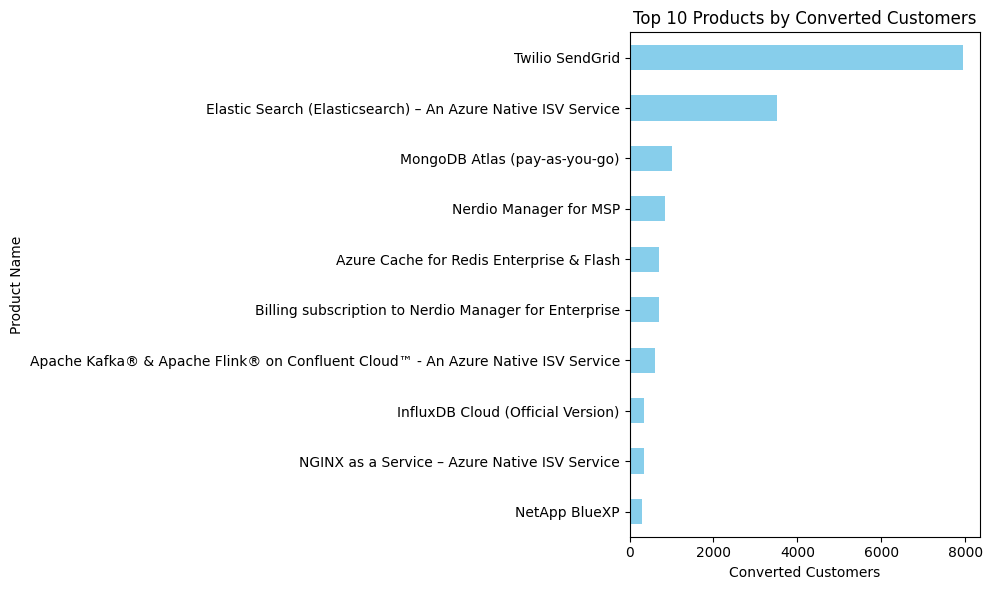

In [ ]:
# Grouping by ProductDisplayName and summing up the ConvertedCustomers
top_10_products = free_plans_converted.groupby('ProductDisplayName')['ConvertedCustomers'].sum().sort_values(ascending=False).head(10)

# Creating the horizontal bar chart
plt.figure(figsize=(10, 6))
top_10_products.plot(kind='barh', color='skyblue')
plt.xlabel('Converted Customers')
plt.ylabel('Product Name')
plt.title('Top 10 Products by Converted Customers')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value on top
plt.tight_layout()
plt.show()



---



---



In [ ]:
free_trials_converted.head()

,PublisherName,ProductDisplayName,HasFreeTrials,IsLive,IsTransactableInclusivePrivateBusiness,IsThirdParty,CPPAppId,TrialCustomers,ConvertedCustomers,TrialConversionRate
0,Canonical,Ubuntu Pro 18.04 LTS,True,True,True,True,canonical.0001-com-ubuntu-pro-bionic,3429.0,857.0,0.25
1,Fortinet,Fortinet FortiGate Next-Generation Firewall (VM),True,True,True,True,fortinet.fortinet_fortigate-vm_v5,2135.0,1154.0,0.54
2,Canonical,Ubuntu Pro 22.04 LTS,True,True,True,True,canonical.0001-com-ubuntu-pro-jammy,915.0,386.0,0.42
3,"Palo Alto Networks, Inc.",VM-Series Next Generation Firewall,True,True,True,True,paloaltonetworks.vmseries-flex,759.0,428.0,0.56
4,Canonical,Ubuntu Pro 20.04 LTS,True,True,True,True,canonical.0001-com-ubuntu-pro-focal,514.0,273.0,0.53


<Figure size 1200x800 with 0 Axes>

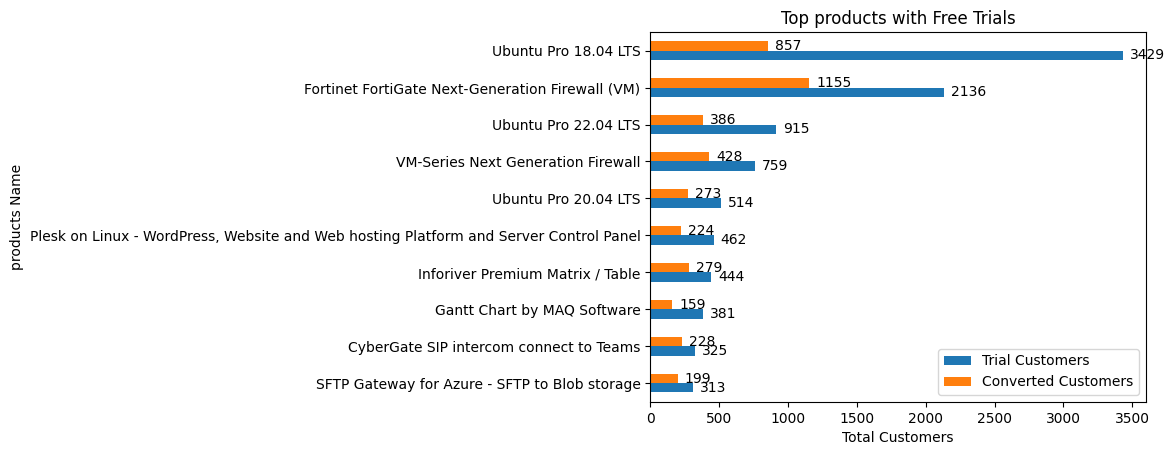

In [ ]:
top_publishers_free_trials = free_trials_converted[free_trials_converted['HasFreeTrials']].groupby('ProductDisplayName')['TrialCustomers', 'ConvertedCustomers'].sum().nlargest(10, columns='TrialCustomers')

# Sort the data in descending order
top_publishers_free_trials_sorted = top_publishers_free_trials.sort_values(by='TrialCustomers', ascending=True)

plt.figure(figsize=(12, 8))
ax = top_publishers_free_trials_sorted.plot(kind='barh', stacked=False)
plt.title('Top products with Free Trials')
plt.ylabel('products Name')
plt.xlabel('Total Customers')
plt.legend(['Trial Customers', 'Converted Customers'], loc='lower right')

# Add annotations for each bar
for p in ax.patches:
    width = p.get_width()
    plt.annotate(f'{width:.0f}', (width, p.get_y() + p.get_height() / 2), ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()

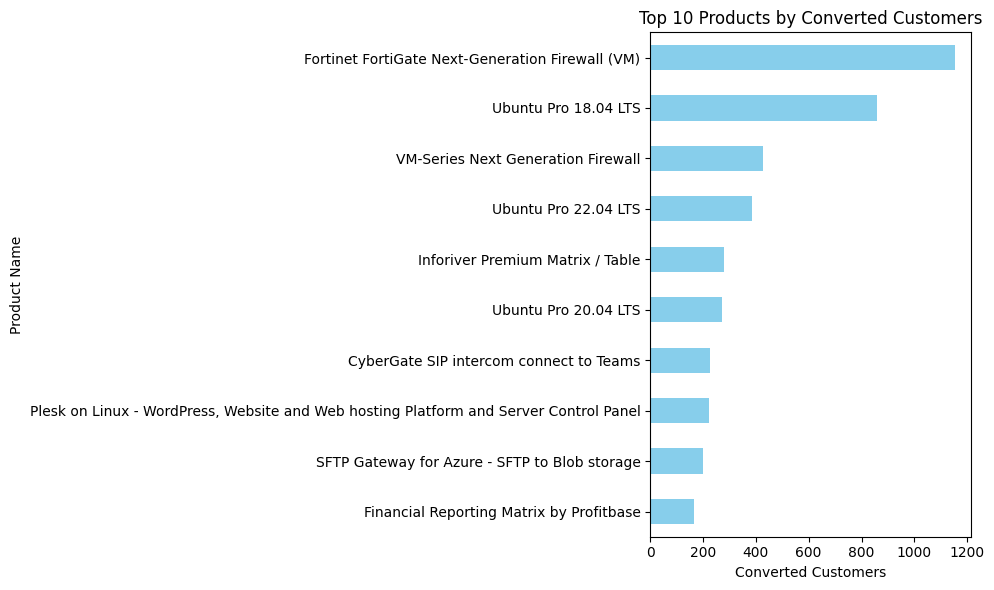

In [ ]:
# Grouping by ProductDisplayName and summing up the ConvertedCustomers
top_10_products = free_trials_converted.groupby('ProductDisplayName')['ConvertedCustomers'].sum().sort_values(ascending=False).head(10)

# Creating the horizontal bar chart
plt.figure(figsize=(10, 6))
top_10_products.plot(kind='barh', color='skyblue')
plt.xlabel('Converted Customers')
plt.ylabel('Product Name')
plt.title('Top 10 Products by Converted Customers')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value on top
plt.tight_layout()
plt.show()



---



---



In [ ]:
FreePlanDays.head()

,ProductDisplayName,PublisherName,HasFreeTrials,HasFreePlans,TrialCustomers,ConvertedCustomers,AvgDaysToConvert,MedianDaysToConvert,TrialConversionRate
0,Cloud Next-Generation Firewall by Palo Alto Ne...,"Palo Alto Networks, Inc.",False,True,467,183,35.087887,30,0.39
1,Twilio SendGrid,SendGrid,False,True,40194,6483,15.000963,0,0.16
2,Elastic Search (Elasticsearch) – An Azure Nati...,Elastic,False,True,5799,3461,6.978790,0,0.60
3,Azure Cache for Redis Enterprise & Flash,Redis,False,True,827,690,1.661413,0,0.83
4,Billing subscription to Nerdio Manager for Ent...,Nerdio,False,True,751,673,0.954000,0,0.90


<Figure size 1200x800 with 0 Axes>

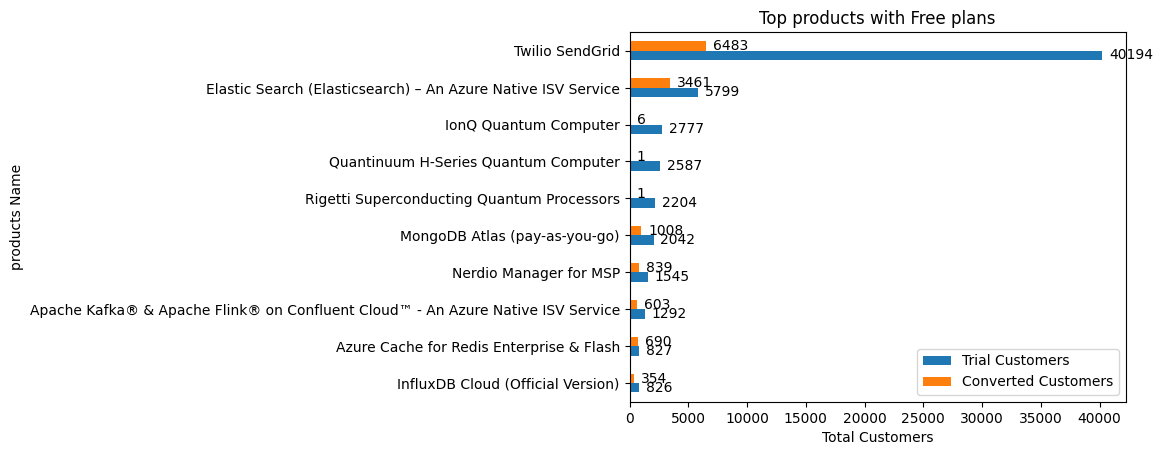

In [ ]:
top_publishers_free_plans = FreePlanDays[FreePlanDays['HasFreePlans']].groupby('ProductDisplayName')['TrialCustomers', 'ConvertedCustomers'].sum().nlargest(10, columns='TrialCustomers')

# Sort the data in descending order
top_publishers_free_trials_sorted = top_publishers_free_plans.sort_values(by='TrialCustomers', ascending=True)

plt.figure(figsize=(12, 8))
ax = top_publishers_free_trials_sorted.plot(kind='barh', stacked=False)
plt.title('Top products with Free plans')
plt.ylabel('products Name')
plt.xlabel('Total Customers')
plt.legend(['Trial Customers', 'Converted Customers'], loc='lower right')

# Add annotations for each bar
for p in ax.patches:
    width = p.get_width()
    plt.annotate(f'{width:.0f}', (width, p.get_y() + p.get_height() / 2), ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()

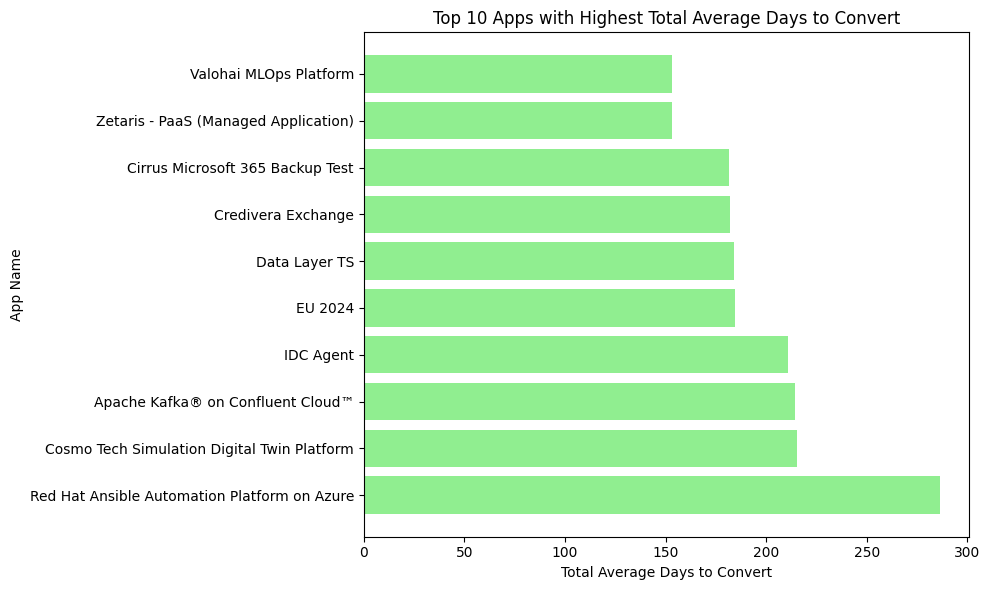

In [ ]:
# Selecting the top 10 apps with the least AvgDaysToConvert
top_10_days = FreePlanDays.groupby('ProductDisplayName')['AvgDaysToConvert'].sum().sort_values(ascending=False).head(10)

# Extracting relevant data
app_names = top_10_days.index
avg_days_to_convert = top_10_days.values

# Creating the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(app_names, avg_days_to_convert, color='lightgreen')
plt.xlabel('Total Average Days to Convert')
plt.ylabel('App Name')
plt.title('Top 10 Apps with Highest Total Average Days to Convert')
plt.tight_layout()
plt.show()



---



---



In [ ]:
FreeTrialDays.head()

,ProductDisplayName,PublisherName,HasFreeTrials,HasFreePlans,TrialCustomers,ConvertedCustomers,AvgDaysToConvert,MedianDaysToConvert,TrialConversionRate
0,Ubuntu Pro 18.04 LTS,Canonical,True,True,3429,803,46.988221,31,0.23
1,Calendar Pro by OKVIZ,OKVIZ Corp.,True,True,197,105,37.852778,31,0.53
2,Fortinet FortiGate Next-Generation Firewall (VM),Fortinet,True,True,2135,757,29.134963,30,0.35
3,SFTP Gateway for Azure - SFTP to Blob storage,Thorn Technologies LLC,True,True,313,103,23.335761,30,0.33
4,Virtual Agent Studio,Witivio,True,True,2,1,29.958333,29,0.50


<Figure size 1200x800 with 0 Axes>

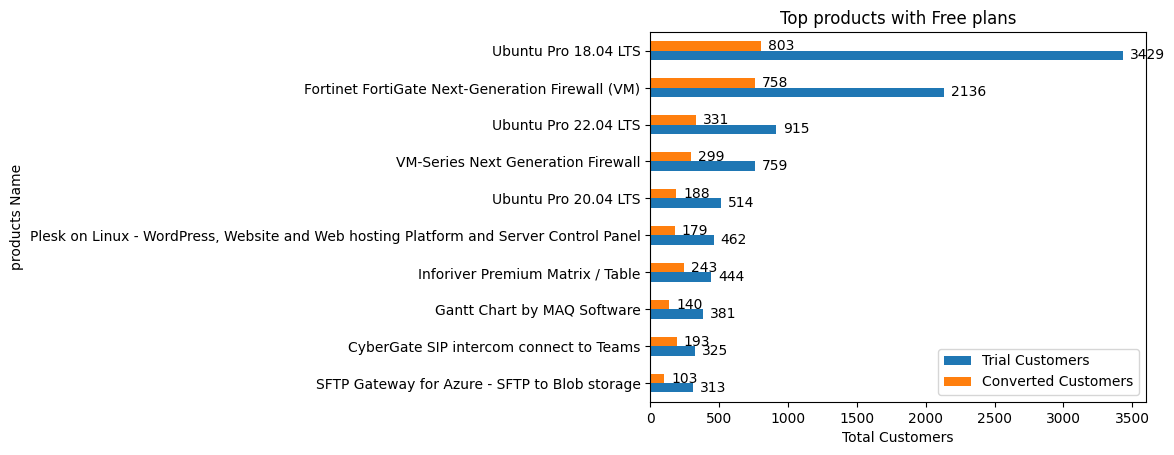

In [ ]:
top_publishers_free_plans = FreeTrialDays[FreeTrialDays['HasFreePlans']].groupby('ProductDisplayName')['TrialCustomers', 'ConvertedCustomers'].sum().nlargest(10, columns='TrialCustomers')

# Sort the data in descending order
top_publishers_free_trials_sorted = top_publishers_free_plans.sort_values(by='TrialCustomers', ascending=True)

plt.figure(figsize=(12, 8))
ax = top_publishers_free_trials_sorted.plot(kind='barh', stacked=False)
plt.title('Top products with Free plans')
plt.ylabel('products Name')
plt.xlabel('Total Customers')
plt.legend(['Trial Customers', 'Converted Customers'], loc='lower right')

# Add annotations for each bar
for p in ax.patches:
    width = p.get_width()
    plt.annotate(f'{width:.0f}', (width, p.get_y() + p.get_height() / 2), ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()

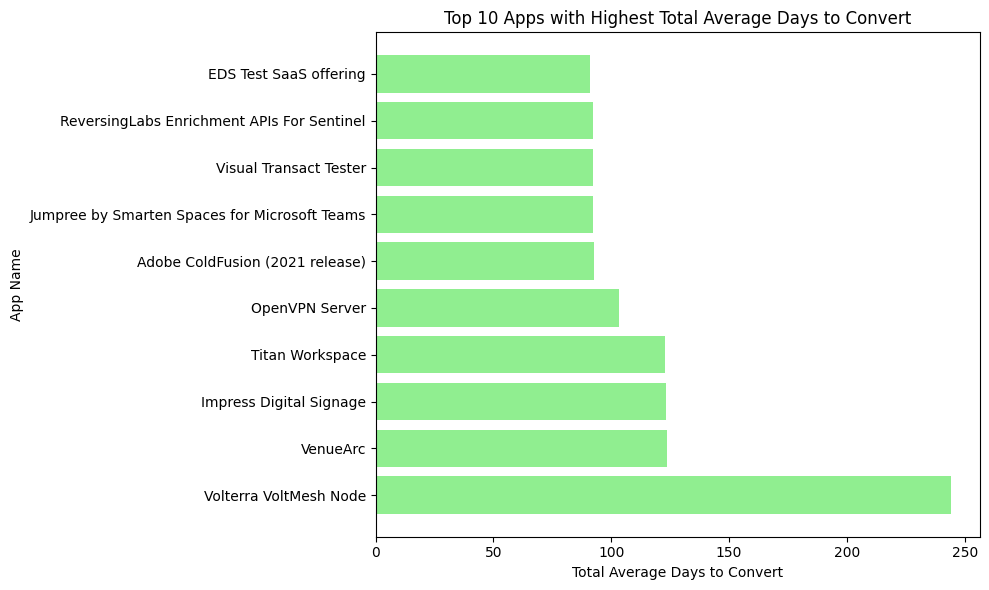

In [ ]:
# Selecting the top 10 apps with the least AvgDaysToConvert
top_10_days = FreeTrialDays.groupby('ProductDisplayName')['AvgDaysToConvert'].sum().sort_values(ascending=False).head(10)

# Extracting relevant data
app_names = top_10_days.index
avg_days_to_convert = top_10_days.values

# Creating the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(app_names, avg_days_to_convert, color='lightgreen')
plt.xlabel('Total Average Days to Convert')
plt.ylabel('App Name')
plt.title('Top 10 Apps with Highest Total Average Days to Convert')
plt.tight_layout()
plt.show()



---



---



In [ ]:
SMB_channel

,SummarySegment,ChannelName,TotalTrialCustomers,TotalConvertedCustomers,TotalRevenue,TrialConversionRate
0,Enterprise,Partner-Led,242.0,171.0,"$2,218,118.60",0.71
1,SMC-C,Partner-Led,183.0,123.0,"$1,845,365.76",0.67
2,Enterprise,Field-Led/EA,2715.0,1737.0,"$71,320,402.40",0.64
3,SMB,Partner-Led,1411.0,878.0,"$5,295,542.30",0.62
4,SMC-C,Field-Led/EA,376.0,228.0,"$1,182,894.24",0.61
5,SMB,Direct,7253.0,4344.0,"$3,602,150.81",0.60
6,SMB,Field-Led/EA,319.0,184.0,"$1,918,069.51",0.58
7,SMC-C,Direct,487.0,240.0,"$979,150.40",0.49
8,Enterprise,Direct,723.0,259.0,"$1,677,721.57",0.36
9,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
SMB_channel.shape

(23, 6)

In [ ]:
SMB_channel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SummarySegment           9 non-null      object 
 1   ChannelName              9 non-null      object 
 2   TotalTrialCustomers      9 non-null      float64
 3   TotalConvertedCustomers  9 non-null      float64
 4    TotalRevenue            9 non-null      object 
 5   TrialConversionRate      9 non-null      float64
dtypes: float64(3), object(3)
memory usage: 1.2+ KB


In [ ]:
# Removing NaN rows
SMB_channel_cleaned = SMB_channel.dropna()

# Removing $ sign and gaps from TotalRevenue column and converting to integer
SMB_channel_cleaned['TotalRevenue'] = SMB_channel_cleaned[' TotalRevenue '].str.replace('$', '').str.replace(',', '').astype(float).astype(int)

# Printing the cleaned DataFrame
display(SMB_channel_cleaned)

,SummarySegment,ChannelName,TotalTrialCustomers,TotalConvertedCustomers,TotalRevenue,TrialConversionRate,TotalRevenue
0,Enterprise,Partner-Led,242.0,171.0,"$2,218,118.60",0.71,2218118
1,SMC-C,Partner-Led,183.0,123.0,"$1,845,365.76",0.67,1845365
2,Enterprise,Field-Led/EA,2715.0,1737.0,"$71,320,402.40",0.64,71320402
3,SMB,Partner-Led,1411.0,878.0,"$5,295,542.30",0.62,5295542
4,SMC-C,Field-Led/EA,376.0,228.0,"$1,182,894.24",0.61,1182894
5,SMB,Direct,7253.0,4344.0,"$3,602,150.81",0.60,3602150
6,SMB,Field-Led/EA,319.0,184.0,"$1,918,069.51",0.58,1918069
7,SMC-C,Direct,487.0,240.0,"$979,150.40",0.49,979150
8,Enterprise,Direct,723.0,259.0,"$1,677,721.57",0.36,1677721


In [ ]:
# Grouping the DataFrame by 'ChannelName' and aggregating with different functions
aggregated_by_channel = SMB_channel_cleaned.groupby('ChannelName').agg({
    'TotalTrialCustomers': 'sum',
    'TotalConvertedCustomers': 'sum',
    'TrialConversionRate': 'mean',
    'TotalRevenue': 'sum'
})
# Calculate the percentage of revenue for each channel
total_revenue = aggregated_by_channel['TotalRevenue'].sum()
aggregated_by_channel['Percentage of Revenue'] = (aggregated_by_channel['TotalRevenue'] / total_revenue) * 100

# Displaying the table with mean TrialConversionRate and percentage of revenue
display(aggregated_by_channel)

,TotalTrialCustomers,TotalConvertedCustomers,TrialConversionRate,TotalRevenue,Percentage of Revenue
ChannelName,,,,,
Direct,8463.0,4843.0,0.483333,6259021,6.951424
Field-Led/EA,3410.0,2149.0,0.610000,74421365,82.654211
Partner-Led,1836.0,1172.0,0.666667,9359025,10.394365


<Axes: xlabel='ChannelName', ylabel='SummarySegment'>

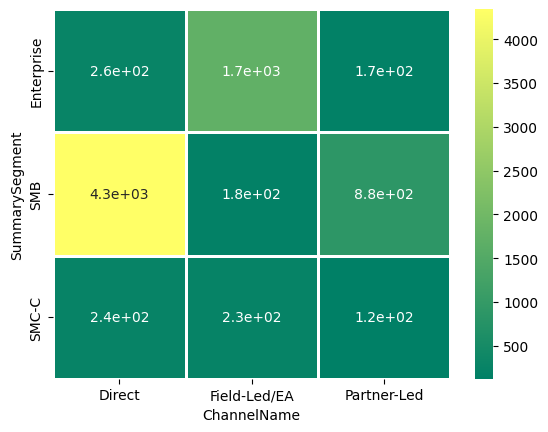

In [ ]:
d=SMB_channel_cleaned.pivot_table(index='SummarySegment',columns='ChannelName',values='TotalConvertedCustomers',aggfunc='mean')
sns.heatmap(d,linewidths=1,annot=True,cmap='summer')

<Axes: xlabel='ChannelName', ylabel='SummarySegment'>

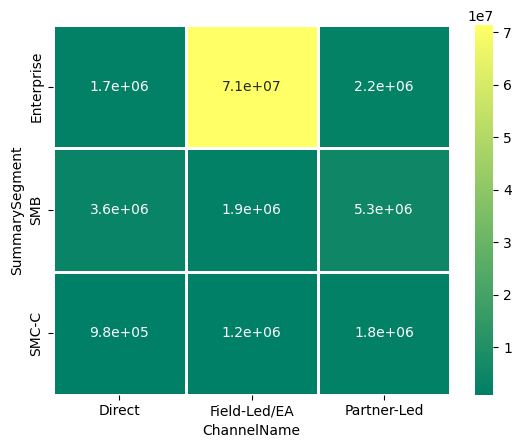

In [ ]:
d=SMB_channel_cleaned.pivot_table(index='SummarySegment',columns='ChannelName',values='TotalRevenue',aggfunc='mean')
sns.heatmap(d,linewidths=1,annot=True,cmap='summer')

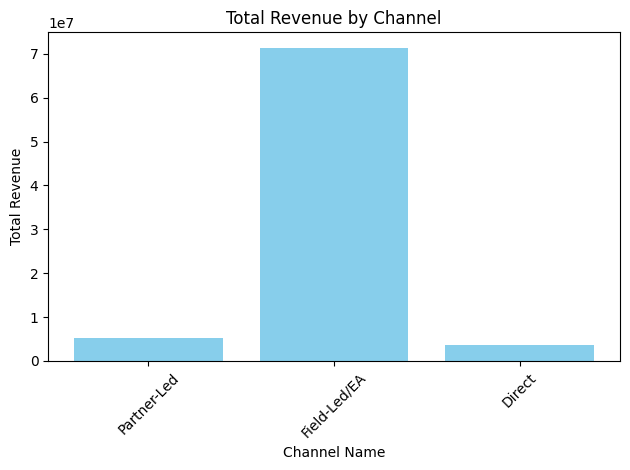

In [ ]:
# Extracting relevant data
channel_names = SMB_channel_cleaned['ChannelName']
total_revenue = SMB_channel_cleaned['TotalRevenue']

# Creating the bar graph
plt.bar(channel_names, total_revenue, color='skyblue')
plt.xlabel('Channel Name')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Channel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



---



---



In [ ]:
SMB_channel_free_plans

,SummarySegment,ChannelName,TotalTrialCustomers,TotalConvertedCustomers,TotalRevenue,TrialConversionRate
0,Enterprise,Field-Led/EA,13752,6025,6.870969e+08,0.44
1,SMB,Direct,23615,10246,2.673158e+07,0.43
2,SMC-C,Field-Led/EA,2302,967,1.291865e+07,0.42
3,SMB,Field-Led/EA,1948,812,1.001694e+07,0.42
4,SMC-C,Direct,1838,729,1.991468e+07,0.40
5,SMB,Partner-Led,6559,2374,1.127719e+07,0.36
6,Enterprise,Direct,2960,1063,2.386426e+07,0.36
7,SMC-C,Partner-Led,731,253,2.575950e+06,0.35
8,Enterprise,Partner-Led,926,319,2.966872e+06,0.34
9,NaN,Partner-Led,393,16,1.473448e+04,0.04


In [ ]:
SMB_channel_free_plans = SMB_channel_free_plans.dropna(subset=['ChannelName'])

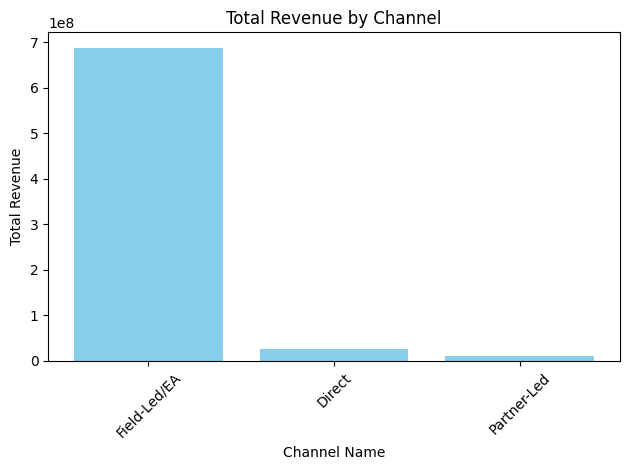

In [ ]:
# Extracting relevant data
channel_names = SMB_channel_free_plans['ChannelName']
total_revenue = SMB_channel_free_plans['TotalRevenue']

# Creating the bar graph
plt.bar(channel_names, total_revenue, color='skyblue')
plt.xlabel('Channel Name')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Channel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='ChannelName', ylabel='SummarySegment'>

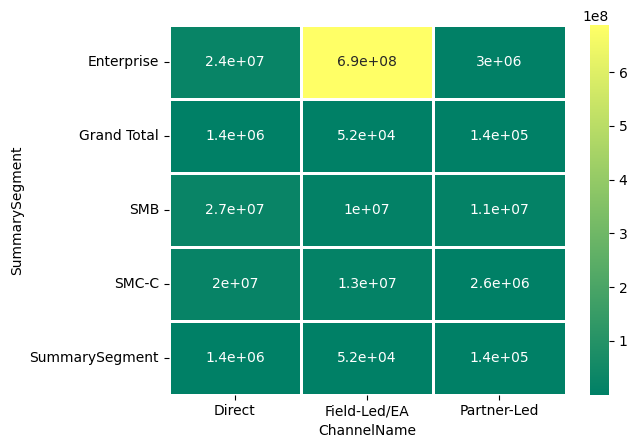

In [ ]:
d=SMB_channel_free_plans.pivot_table(index='SummarySegment',columns='ChannelName',values='TotalRevenue',aggfunc='mean')
sns.heatmap(d,linewidths=1,annot=True,cmap='summer')

<Axes: xlabel='ChannelName', ylabel='SummarySegment'>

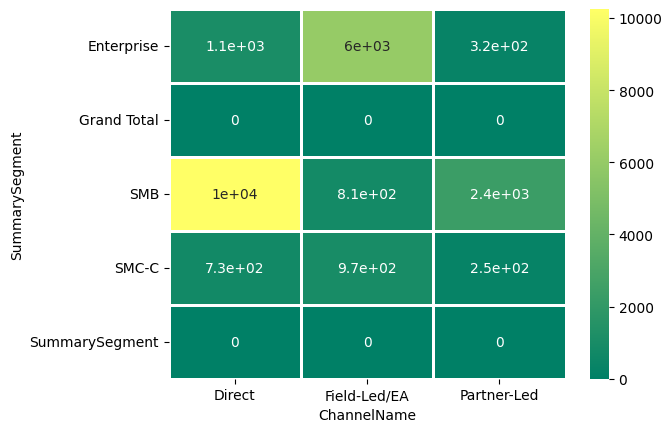

In [ ]:
d=SMB_channel_free_plans.pivot_table(index='SummarySegment',columns='ChannelName',values='TotalConvertedCustomers',aggfunc='mean')
sns.heatmap(d,linewidths=1,annot=True,cmap='summer')

In [ ]:
# Grouping the DataFrame by 'ChannelName' and aggregating with different functions
aggregated_by_channel = SMB_channel_free_plans.groupby('ChannelName').agg({
    'TotalTrialCustomers': 'sum',
    'TotalConvertedCustomers': 'sum',
    'TrialConversionRate': 'mean',
    'TotalRevenue': 'sum'
})
# Calculate the percentage of revenue for each channel
total_revenue = aggregated_by_channel['TotalRevenue'].sum()
aggregated_by_channel['Percentage of Revenue'] = (aggregated_by_channel['TotalRevenue'] / total_revenue) * 100

# Displaying the table with mean TrialConversionRate and percentage of revenue
display(aggregated_by_channel)

,TotalTrialCustomers,TotalConvertedCustomers,TrialConversionRate,TotalRevenue,Percentage of Revenue
ChannelName,,,,,
Direct,64632,12544,0.3000,7.336400e+07,9.163492
Field-Led/EA,19235,7809,0.3200,7.101380e+08,88.699412
Partner-Led,8609,2962,0.2725,1.710984e+07,2.137096




---



---



---

